In [21]:
import mat73
import seaborn as sns
import pandas as pd

In [22]:
data_path = "data/U08_Wind turbine.mat"

In [23]:
data_dict = mat73.loadmat(data_path)

In [24]:
data_dict.keys()

dict_keys(['Sig_Mic_rotating'])

In [25]:
data_dict['Sig_Mic_rotating'].shape

(112, 1443840)

In [26]:
df = pd.DataFrame(data_dict['Sig_Mic_rotating'])

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,1443830,1443831,1443832,1443833,1443834,1443835,1443836,1443837,1443838,1443839
0,-0.103118,0.170339,-0.038984,-0.019245,0.134530,-0.010261,0.026693,-0.131819,-0.037115,0.119088,...,0.287957,0.032532,-0.064833,0.174807,0.108886,-0.091919,0.104318,0.111371,-0.114988,0.103959
1,0.170298,-0.081546,-0.048070,0.282553,-0.204108,-0.128456,0.177461,-0.081159,-0.034927,0.108205,...,0.124897,0.004718,0.085580,0.072655,0.053859,0.063286,0.043901,0.175090,0.015201,-0.091682
2,0.074469,0.182517,-0.200882,0.019958,0.135583,-0.177392,0.076159,0.090101,-0.303096,0.144391,...,0.120385,0.115032,-0.035356,-0.043067,0.219132,0.192315,-0.164055,0.038820,0.052428,-0.068953
3,0.059986,0.121333,-0.044660,0.095858,0.194884,-0.187054,0.022561,0.124038,-0.164811,0.083338,...,0.147793,-0.063977,-0.002904,0.197820,0.069463,-0.111830,0.036990,0.026958,-0.089366,0.158575
4,0.090063,-0.065729,0.003653,0.114549,-0.150117,-0.059386,0.192758,-0.121235,-0.007083,0.218607,...,0.081001,0.142409,0.005909,0.032821,0.112371,-0.083210,0.101856,0.187327,-0.064160,0.178197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.068975,0.201707,-0.055611,-0.061895,0.166372,-0.027529,0.029796,0.069733,-0.140758,-0.003028,...,0.098003,0.132302,0.020276,0.268520,0.083455,-0.159370,0.106972,-0.067258,-0.149894,0.216518
108,0.215595,-0.018450,-0.152884,0.225498,0.144901,-0.126530,0.142798,0.291698,-0.229762,-0.188028,...,0.322260,0.049790,-0.042286,0.094340,0.205332,-0.014794,0.060969,0.210477,-0.015232,-0.077943
109,0.043494,-0.128501,0.218070,0.054458,-0.229245,0.216065,0.133092,-0.329980,0.091904,0.196695,...,0.027700,0.192243,-0.002949,-0.004173,0.320651,-0.003132,-0.058814,0.361377,0.002679,-0.070764
110,-0.100191,0.026074,0.117946,-0.049203,0.048859,0.025561,0.090759,0.069143,-0.126879,0.111796,...,0.122824,0.178063,-0.102802,0.068981,0.254044,0.042059,-0.025558,0.267195,-0.007374,-0.157518


In [47]:
sample_rate = 48128

# Reduce number of points to plot in heatmap
df_compact = df.iloc[::1,::sample_rate]

df_compact

,0,48128,96256,144384,192512,240640,288768,336896,385024,433152,...,962560,1010688,1058816,1106944,1155072,1203200,1251328,1299456,1347584,1395712
0,-0.103118,0.147802,-0.168498,-0.117089,-0.017728,-0.093401,0.004332,-0.212610,0.008980,-0.068905,...,-0.002021,-0.050561,-0.086197,-0.199604,0.110919,0.002042,-0.003896,0.086367,-0.066166,0.058059
1,0.170298,0.045189,-0.082368,-0.049699,-0.102392,0.073931,-0.389043,-0.046122,0.142172,0.016612,...,-0.142240,-0.073398,0.051570,0.287986,0.173298,-0.104202,-0.021923,-0.001813,-0.013532,-0.165024
2,0.074469,0.048977,-0.097910,-0.182842,-0.153245,0.014498,0.065827,-0.153764,0.046322,0.054724,...,-0.223729,-0.175437,0.036702,0.269370,-0.087178,0.116134,0.081693,0.029125,-0.079301,-0.044532
3,0.059986,0.148278,0.088837,-0.144064,0.039406,0.033091,0.026284,-0.025746,-0.081369,0.074465,...,0.071350,-0.232378,0.228737,0.332567,-0.100233,-0.124552,0.072308,0.141406,0.001474,0.003855
4,0.090063,-0.068112,0.019053,-0.141943,0.048786,0.031479,-0.067531,-0.120222,-0.095966,-0.073064,...,0.217700,-0.084530,0.233255,-0.035247,-0.124403,-0.006042,0.096466,0.183683,0.063629,0.020590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.068975,-0.049054,0.062180,0.146056,0.044941,0.033430,0.142400,-0.101449,-0.030646,-0.208038,...,-0.056598,0.152931,-0.184131,0.323123,-0.055274,-0.130437,-0.140798,-0.036077,-0.026143,-0.051708
108,0.215595,0.135111,-0.089408,0.227243,0.065246,-0.058661,0.243432,0.046282,-0.132387,0.048228,...,-0.054337,-0.089613,0.149105,0.053137,0.036136,-0.026125,0.069034,0.052457,0.110035,0.003858
109,0.043494,0.002419,0.005358,-0.092890,0.047259,-0.062074,0.051551,0.056103,0.099302,0.008063,...,-0.081605,-0.017070,-0.053844,-0.210479,-0.125777,0.002040,-0.056173,-0.156249,-0.090339,0.024812
110,-0.100191,0.083615,-0.001961,-0.251628,-0.109537,-0.179033,-0.188716,-0.061447,0.047553,-0.136695,...,0.051089,-0.099734,-0.432282,-0.028350,-0.299220,-0.047690,0.026451,-0.068039,-0.034049,0.122112


<AxesSubplot:>

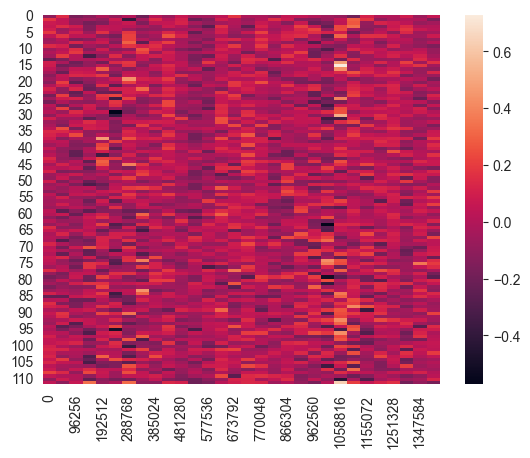

In [38]:
sns.heatmap(df_compact)